# Задание №1

### Датчик Бернулли

In [14]:
import numpy as np

In [15]:
def BernRnd(p, *args):
    p = np.array(p)                 #Добавил возможность для метода фон Неймана сэмплировать с заданной матрицей
    if ((0 <= p) * (p <= 1)).all(): #вероятностей p, размер которой совпадает с *args
        if args:
            if type(args[0]) == int:
                list_args = list(args)
            else:
                list_args = args[0]
            return np.random.uniform(size=list_args) < p
        else:
            return np.random.uniform() < p
    else: 
        print('Error! p is out of bounds')

In [16]:
#Проверка выдаваемой размерности
assert np.shape(BernRnd(0.2)) == (), "Неверный размер, тест 1"
assert np.shape(BernRnd(0.2, 2)) == (2,), "Неверный размер, тест 2"
assert np.shape(BernRnd(0.2, 2, 5)) == (2, 5), "Неверный размер, тест 3"
assert np.shape(BernRnd(0.2, 2, 5, 3)) == (2, 5, 3), "Неверный размер, тест 4"
assert np.shape(BernRnd(0.2, [2, 5])) == (2, 5), "Неверный размер, тест 5"
assert np.shape(BernRnd(0.2, [2, 5, 3])) == (2, 5, 3), "Неверный размер, тест 6"

print("Тесты пройдены!")

Тесты пройдены!


In [17]:
#Тест функции
BernRnd([1.1, 0.2], 1, 2)

Error! p is out of bounds


### Датчик биномиального

In [18]:
def BinomRnd(p, n, *args):
    list_args = [n]
    if args:
        if type(args[0]) == int:
            list_args += list(args)
        else:
            list_args += args[0]
    return np.sum(BernRnd(p, list_args), axis=0)

In [19]:
#Проверка выдаваемой размерности
assert np.shape(BinomRnd(0.2, 5)) == (), "Неверный размер, тест 1"
assert np.shape(BinomRnd(0.2, 5, 2)) == (2,), "Неверный размер, тест 2"
assert np.shape(BinomRnd(0.2, 5, 2, 5)) == (2, 5), "Неверный размер, тест 3"
assert np.shape(BinomRnd(0.2, 5, 2, 5, 3)) == (2, 5, 3), "Неверный размер, тест 4"
assert np.shape(BinomRnd(0.2, 5, [2, 5])) == (2, 5), "Неверный размер, тест 5"
assert np.shape(BinomRnd(0.2, 5, [2, 5, 3])) == (2, 5, 3), "Неверный размер, тест 6"

print("Тесты пройдены!")

Тесты пройдены!


In [20]:
#Тест функции
BinomRnd(0.5, 5, 2, 5)

array([[1, 4, 2, 2, 2],
       [2, 3, 4, 2, 4]])

### Визуализация

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
def factorial(n):
    fact = 1
    while n > 0:
        fact *= n
        n -= 1
    return fact

def binom(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def theoreticalBinom(p, n, k):
    return binom(n, k) * (p**k) * (1 - p)**(n - k)

In [23]:
p = 0.6
n = 20
count_samples = 10000

In [24]:
#Правило трёх сигм 
x_r = int(n*p + 3*np.sqrt(n*p)) + 1 
x_l = max(0, int(n*p - 3*np.sqrt(n*p)))

#Находим теоретическое распределение
theorBin = [theoreticalBinom(p, n, k) for k in range(x_l, x_r+1)]

In [25]:
#Эмпирическое распределение
Samples = BinomRnd(p, n, count_samples)
pracBin = [np.sum(Samples == k) / count_samples for k in range(x_l, x_r+1)]

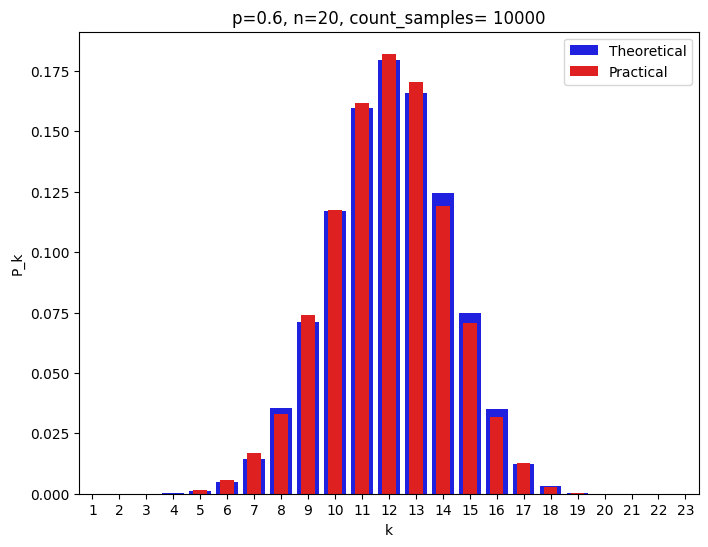

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=np.arange(x_l, x_r+1), y=theorBin, color="blue", label='Theoretical')
sns.barplot(x=np.arange(x_l, x_r+1), y=pracBin, color="red", label='Practical', width=0.5)
ax.set(xlabel='k', ylabel='P_k', title=f'p={p}, n={n}, count_samples= {count_samples}')
ax.legend()

## Генератор геометрического распределения

In [27]:
def GeomRnd(p, *args):
    if args:
        if type(args[0]) == int:
            list_args = list(args)
        else:
            list_args = args[0]
        i_finish = np.zeros(list_args)
    else:
        i_finish = np.array(0)
        
    i = 1
    while (i_finish == 0).any():
        cur = BernRnd(p, *args)
        i_finish += (i_finish == 0) * (cur == 1) * i 
        i += 1
    return i_finish

In [28]:
#Проверка выдаваемой размерности
assert np.shape(GeomRnd(0.2)) == (), "Неверный размер, тест 1"
assert np.shape(GeomRnd(0.2, 2)) == (2,), "Неверный размер, тест 2"
assert np.shape(GeomRnd(0.2, 2, 5)) == (2, 5), "Неверный размер, тест 3"
assert np.shape(GeomRnd(0.2, 2, 5, 3)) == (2, 5, 3), "Неверный размер, тест 4"
assert np.shape(GeomRnd(0.2, [2, 5])) == (2, 5), "Неверный размер, тест 5"
assert np.shape(GeomRnd(0.2, [2, 5, 3])) == (2, 5, 3), "Неверный размер, тест 6"

print("Тесты пройдены!")

Тесты пройдены!


In [29]:
#Тест функции
GeomRnd(0.5, [5, 5])

array([[1., 2., 1., 2., 7.],
       [3., 1., 1., 2., 1.],
       [2., 3., 1., 4., 1.],
       [2., 2., 2., 1., 3.],
       [2., 2., 2., 2., 1.]])

### Визуализация

In [30]:
p = 0.2
#Диапазон сосредоточения 99% выборки
#F^{-1}(y) = log_{1-p}{1-y}
n = int(np.floor(np.log(0.01) / np.log(1 - p))) + 1
count_samples = 10000

In [31]:
#Теоретическое распределение
theorGeom = [p*(1-p)**(k-1) for k in range(1, n+1)]

In [32]:
#Эмпирическое распределение
Samples = GeomRnd(p, count_samples)
pracGeom = [np.sum(Samples==k)/count_samples for k in range(1, n+1)]

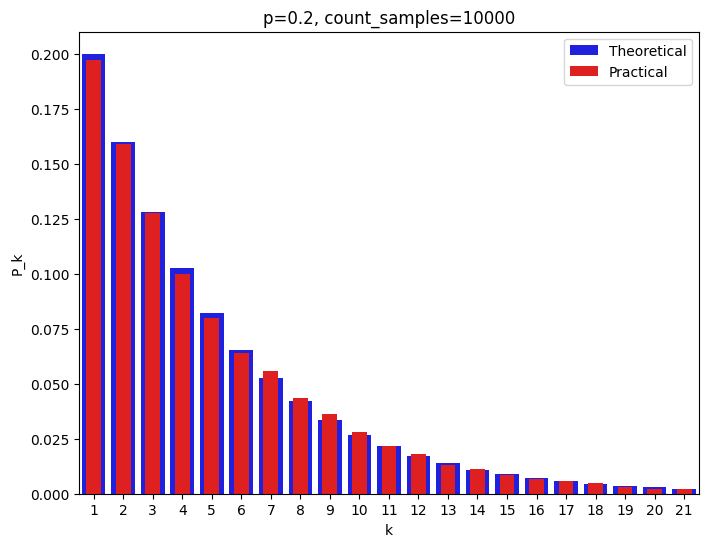

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=np.arange(1, n+1), y=theorGeom, color="blue", label='Theoretical')
sns.barplot(x=np.arange(1, n+1), y=pracGeom, color="red", label='Practical', width=0.5)
ax.set(xlabel='k', ylabel='P_k', title=f'p={p}, count_samples={count_samples}')
ax.legend()

### Свойство отсутствия памяти

In [135]:
p = 0.2
count_samples = 10000
a = 4
b = 2
#Диапазон сосредоточения 99% выборки
n = int(np.floor(np.log(0.01) / np.log(1 - p))) + 1

In [136]:
Samples = GeomRnd(p, count_samples)

Samples_2 = Samples[Samples > a]
Count_2 = np.size(Samples_2)
Samples_2 = Samples_2[Samples_2 > a + b]

Geom_base = [np.sum(Samples==k)/count_samples for k in range(b+1, n+b+1)]
Geom_shift = [np.sum(Samples_2==k)/Count_2 for k in range(a+b+1, n+a+b+1)]

[Text(0.5, 1.0, 'a=4, b=2, count_samples=10000')]

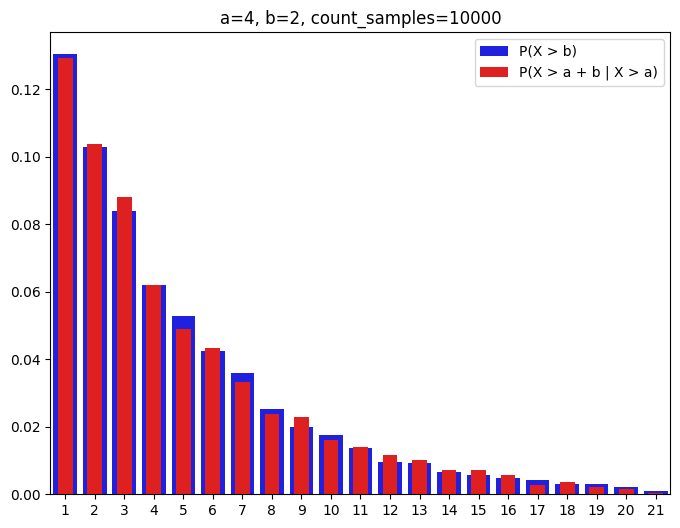

In [137]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=np.arange(1, n+1), y=Geom_base, color="blue", label='P(X > b)')
sns.barplot(x=np.arange(1, n+1), y=Geom_shift, color="red", label='P(X > a + b | X > a)',  width=0.5)
ax.legend()
ax.set(title=f'a={a}, b={b}, count_samples={count_samples}')

## Игра в орлянку

In [37]:
n = 10000
y = np.cumsum((-1) ** (BernRnd(0.5, n) + 1)) / np.sqrt(n)

[Text(0.5, 1.0, 'n = 10000')]

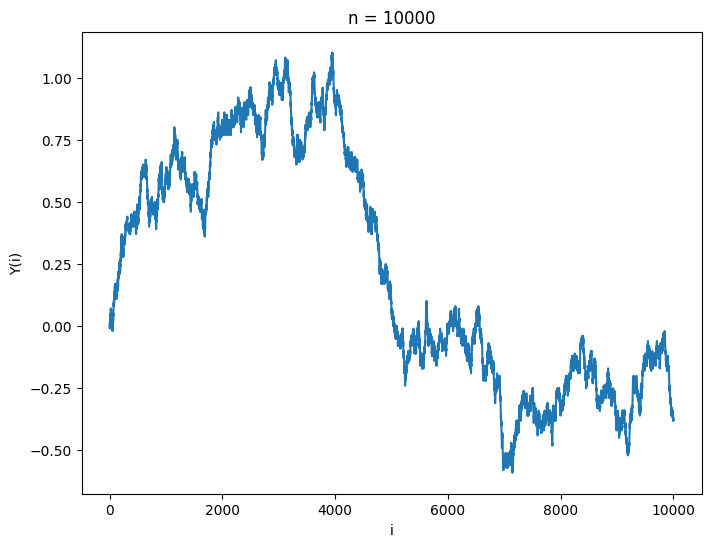

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
plt.plot(np.arange(1, n+1), y)
ax.set(xlabel='i', ylabel='Y(i)')
ax.set(title=f'n = {n}')

# Задание №2

### Датчик сингулярного распределения

In [39]:
def CantRnd(n=1, eps=1e-10, return_sort=True):
    
    num_of_digits = int(-np.log(eps) / np.log(3)) + 2
    bern = BernRnd(0.5, n, num_of_digits)
    deg = np.arange(1, num_of_digits + 1)
    
    x = np.sum(bern * 2 / (3 ** deg), axis=1)
    F = np.sum(bern / (2 ** deg), axis=1)
    
    if return_sort:
        return np.sort(x), np.sort(F)
    else:
        return x, F

In [40]:
from scipy.interpolate import interp1d
count_samples = 1000

In [41]:
x_theor, F_theor = CantRnd(n=count_samples)

#Для удобства построения эмпирической функции распределения добавим крайние значения
x_theor = np.append(x_theor, 1)
x_theor = np.insert(x_theor, 0, 0)

num = 10001 
x = np.linspace(0.0, 1.0, num=num)

F_prac = [(i+1)/count_samples for i in range(count_samples)]
#Кусочнопостоянная интерполяция, непрерывная справа
f = interp1d(x_theor, [0] + F_prac + [1], kind='previous')
F_prac = f(x)

[Text(0.5, 1.0, 'count_samples = 1000')]

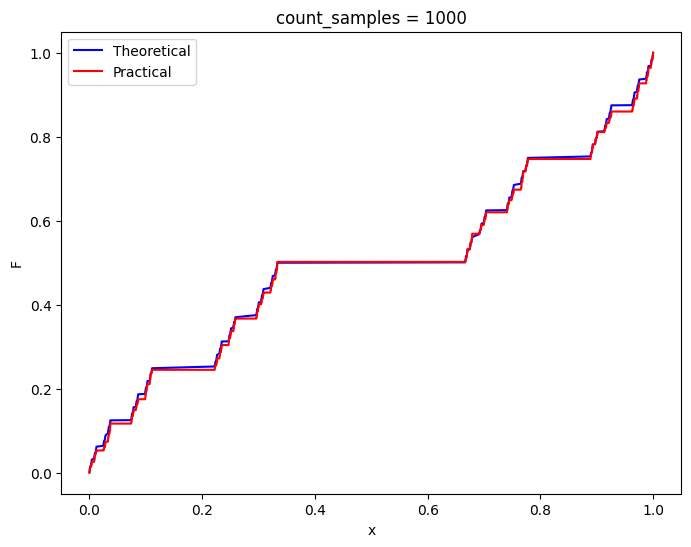

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
plt.plot(x_theor[1:-1], F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f'count_samples = {count_samples}')

### Проверка CantRnd критерием Колмогорова

In [43]:
def KolmCrit(F_theor, eps=1e-10, alpha=0.05):
    count_samples = np.size(F_theor)
    F_prac = np.arange(1, count_samples+1) / count_samples
    D_n = np.max(np.abs(F_prac - F_theor))
    T_n = np.sqrt(count_samples) * D_n
    
    n = max(int(1/(T_n**2))+1, int(np.log(2/(eps*(np.e-1))))+2)
    k = np.arange(1, n)
    F_k = 1 + 2 * np.sum((-1)**k * np.e**(-2*(k**2)*(T_n**2)))
    
    return 1 - F_k > alpha

In [44]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 1000
for i in range(count_it):
    x_theor, F_theor = CantRnd(n=count_samples)
    sum_ += KolmCrit(F_theor)
    
sum_ / count_it

0.9523

In [45]:
#num - число точек в сетке для сравнения F_1 и F_2
def SmirnCrit(x_1, x_2, num=10001, eps=1e-10, alpha=0.05, visualization=False):
    n_samples_1 = np.size(x_1)
    F_1 = [(i+1) / n_samples_1 for i in range(n_samples_1)] 
    x_1 = np.append(x_1, 1)
    x_1 = np.insert(x_1, 0, 0)
    
    n_samples_2 = np.size(x_2)
    F_2 = [(i+1) / n_samples_2 for i in range(n_samples_2)]  
    x_2 = np.append(x_2, 1)
    x_2 = np.insert(x_2, 0, 0)
    
    f_1 = interp1d(x_1, [0] + F_1 + [1], kind='previous')
    f_2 = interp1d(x_2, [0] + F_2 + [1], kind='previous')
    
    xx = np.linspace(0.0, 1.0, num=num)
    
    #Визуализация
    if visualization:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot()    
        plt.plot(xx, f_1(xx))
        plt.plot(xx, f_2(xx))
        plt.show()
    
    D_mn = np.max(np.abs(f_1(xx) - f_2(xx)))
    T_mn = np.sqrt(n_samples_1 * n_samples_2 / (n_samples_1 + n_samples_2)) * D_mn
    
    #Аналогично критерию Колмогорова
    n = max(int(1/(T_mn**2))+1, int(np.log(2/(eps*(np.e-1))))+2)
    k = np.arange(1, n)
    F_s = 1 + 2 * np.sum((-1)**k * np.e**(-2*(k**2)*(T_mn**2)))

    return 1 - F_s > alpha

In [46]:
#Проверка критерием Смирнова CantRnd (вне задания)
sum_ = 0
count_it = 10000
count_samples = 1000
for i in range(count_it):
    x_1, F_theor = CantRnd(n=count_samples)
    x_2, F_theor = CantRnd(n=count_samples)
    sum_ += SmirnCrit(x_1, x_2)
    
sum_ / count_it

0.9512

### Свойство симметричности относительно 1/2

In [47]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 1000
for i in range(count_it):
    x_1, F_theor = CantRnd(n=count_samples)
    x_2, F_theor = CantRnd(n=count_samples)
    x_2 = np.sort(1 - x_2)
    sum_ += SmirnCrit(x_1, x_2)
    
sum_ / count_it

0.9576

### Самоподобие относительно деления на 3

In [48]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 1000
for i in range(count_it):
    y_1, F_theor = CantRnd(n=count_samples)
    y_2, F_theor = CantRnd(n=count_samples)
    y_1 = y_1[y_1 <= 1/3]
    y_2 = y_2 / 3
    sum_ += SmirnCrit(y_1, y_2)
    
sum_ / count_it

0.9645

### Матожидание и дисперсия

In [49]:
count_samples = 10000

In [50]:
x, F = CantRnd(n=count_samples, return_sort=False)
nums = np.arange(1, count_samples+1)
Expected_value = np.cumsum(x)
Expected_value /= nums  

Dispersion = np.sum(np.triu(x[:, np.newaxis] - Expected_value)**2, axis=0) / nums

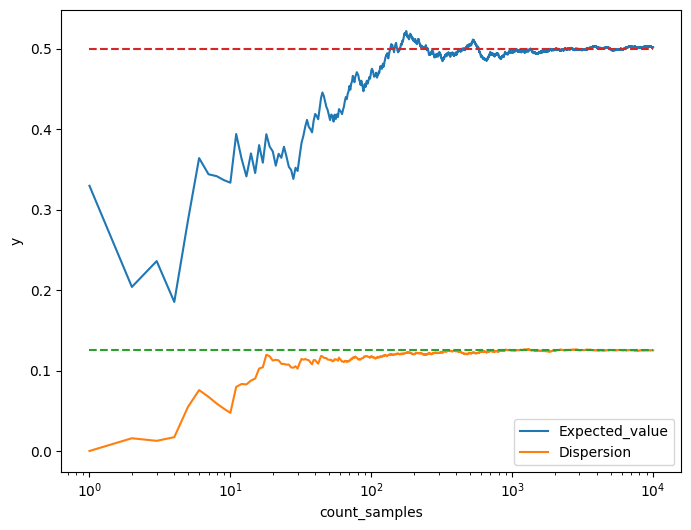

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(nums, Expected_value, label='Expected_value')
plt.plot(nums, Dispersion, label='Dispersion')
plt.plot([1, nums[-1]], [1/8, 1/8], '--')
plt.plot([1, nums[-1]], [1/2, 1/2], '--')
ax.set_xscale('log')
plt.legend()
ax.set(xlabel='count_samples', ylabel='y')
plt.show()

# Задание №3

In [52]:
def ExpRnd(lambda_, *args):
    if (lambda_ > 0):
        if args:
            if type(args[0]) == int:
                list_args = list(args)
            else:
                list_args = args[0]
            y = np.random.uniform(size=list_args)
        else:
            y = np.random.uniform()
        return np.log(1-y) / (-lambda_)
    else: 
        print('Error! Lambda is out of bounds')


In [53]:
lambda_ = 0.5
count_samples = 1000

In [54]:
pracExp = ExpRnd(lambda_, count_samples)
pracExp = np.sort(pracExp)
# Добавим краевое значение для удобства интерполяции
pracExp = np.insert(pracExp, 0, 0)

#Диапазон сосредоточения 99% выборки
x_r = np.log(0.01) / (-lambda_)

F_prac = [(i+1) / count_samples for i in range(count_samples)]
#Есть вероятность не выйти за x_r => проблемы с построением эмпирической через интерполяцию
if pracExp[-1] < x_r:
    pracExp = np.append(pracExp, x_r)
    f = interp1d(pracExp, [0] + F_prac + [1], kind='previous')
else:
    f = interp1d(pracExp, [0] + F_prac, kind='previous')

num = 10001 
x = np.linspace(0.0, x_r, num=num)
F_prac = f(x)
F_theor = 1 - np.e ** (-lambda_ * x)

[Text(0.5, 1.0, ' count_samples = 1000')]

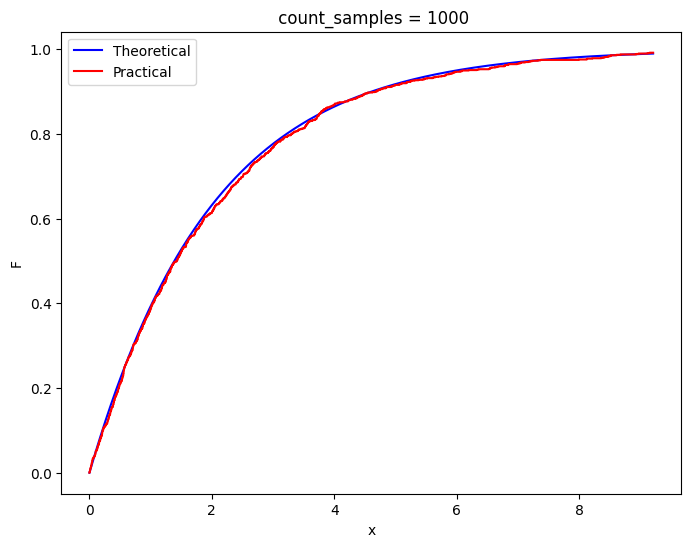

In [55]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f' count_samples = {count_samples}')

### Свойство отсутствия памяти

In [56]:
count_samples = 10000
a = 2
b = 1
lambda_ = 1

In [57]:
Samples = ExpRnd(lambda_, count_samples)

Samples_2 = Samples[Samples > a]
Count_2 = np.size(Samples_2)

Exp_base = np.sort(Samples)
# Добавим краевое значение для удобства интерполяции
Exp_base = np.insert(Exp_base, 0, 0)

Exp_shift = np.sort(Samples_2)
Exp_shift = np.insert(Exp_shift, 0, 0)

F_base = [(i+1) / count_samples for i in range(count_samples)]
f_base = interp1d(Exp_base, [0] + F_base, kind='previous')

F_shift = [(i+1) / Count_2 for i in range(Count_2)]
f_shift = interp1d(Exp_shift, [0] + F_shift, kind='previous')

num = count_samples * 10
x_r = Exp_base[-1]
x_shift = np.linspace(a+b, x_r, num=num)
F_shift = f_shift(x_shift)
x_base = np.linspace(b, x_r-a, num=num)
F_base = f_base(x_base)
x = np.linspace(0.0, x_r - (b+a), num=num)

[Text(0.5, 1.0, 'a = 2, b = 1, count_samples = 10000')]

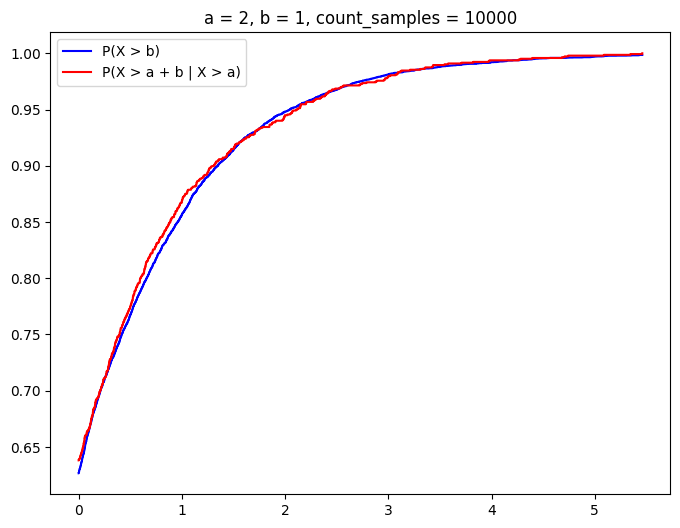

In [58]:
fig = plt.figure(figsize=(8, 6) ) 
ax = fig.add_subplot()  
plt.plot(x, F_base, color='blue', label='P(X > b)')
plt.plot(x, F_shift, color='red', label='P(X > a + b | X > a)')
plt.legend()
ax.set(title=f'a = {a}, b = {b}, count_samples = {count_samples}') 

### Распределение Y = min(X1, X2, ... , Xn)

In [59]:
count_samples = 1000
n = 3
X = np.empty((n, count_samples))
sum_ = 0

for i in range(1, n+1):
    inp = float(input('Введите параметр экспоненциального распределения '))
    sum_ += inp
    X[i-1] = ExpRnd(inp, count_samples)
    
Y = np.min(X, axis=0)

Введите параметр экспоненциального распределения 1
Введите параметр экспоненциального распределения 2
Введите параметр экспоненциального распределения 3


In [60]:
Y = np.sort(Y)
# Добавим краевое значение для удобства интерполяции
Y = np.insert(Y, 0, 0)

#Сосредоточение 99% выборки
x_r = np.log(0.01) / (-sum_)

F_prac = [(i+1) / count_samples for i in range(count_samples)]
#Есть вероятность не выйти за x_r => проблемы с построением эмпирической через интерполяцию
if Y[-1] < x_r:
    Y = np.append(Y, x_r)
    f_Y = interp1d(Y, [0] + F_prac + [1], kind='previous')
else:
    f_Y = interp1d(Y, [0] + F_prac, kind='previous')

num = count_samples * 10
x = np.linspace(0.0, x_r, num=num)
F_Y = f_Y(x)
F_theor = 1 - np.e ** (-sum_ * x)

[Text(0.5, 1.0, 'Lambda_sum = 6.0, count_samples = 1000')]

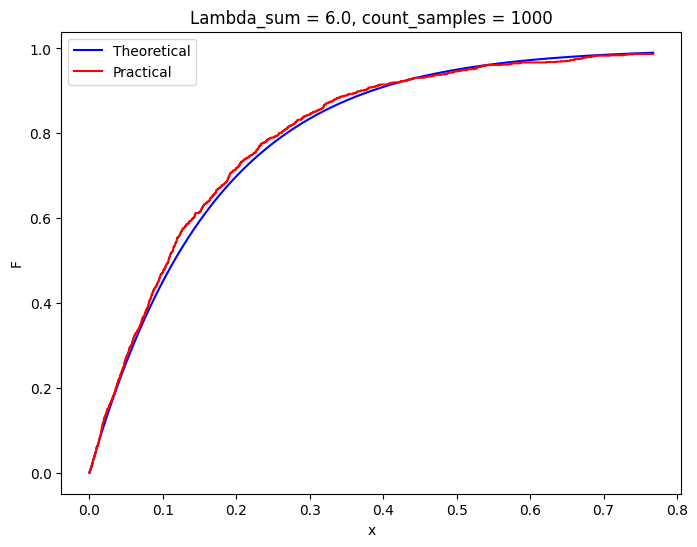

In [61]:
fig = plt.figure(figsize=(8, 6) ) 
ax = fig.add_subplot()  
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_Y, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f'Lambda_sum = {sum_}, count_samples = {count_samples}') 

### Датчик Пуассоновского распределения

In [62]:
def PoissRnd_1(lambda_, *args):
    if (lambda_ > 0):
        if args:
            if type(args[0]) == int:
                list_args = list(args)
            else:
                list_args = args[0]
            finish_sum = np.zeros(list_args)
            i_finish = np.zeros(list_args)
        else:
            finish_sum = np.array(0)
            i_finish = np.array(0)
            
        i = 1
        while (finish_sum <= lambda_).any():
            cur = ExpRnd(1, *args)
            finish_sum[finish_sum <= lambda_] = finish_sum[finish_sum <= lambda_] + cur[finish_sum <= lambda_]
            i_finish += (i_finish == 0) * (finish_sum > lambda_) * i 
            i += 1
        return i_finish - 1   
    else: 
        print('Error! Lambda is out of bounds')
   

In [63]:
lambda_ = 3
count_samples = 10000
#Правило 3-х сигм для пуассоновского
x_r = int(lambda_ + 3 * np.sqrt(lambda_)) + 1
x_l = max(int(lambda_ - 3 * np.sqrt(lambda_)), 0)

In [64]:
theorPoiss = [np.e**(-lambda_)*(lambda_**k)/factorial(k) for k in range(x_l, x_r + 1)]

Samples = PoissRnd_1(lambda_, count_samples)
pracPoiss = [np.sum(Samples==k)/count_samples for k in range(x_l, x_r + 1)]

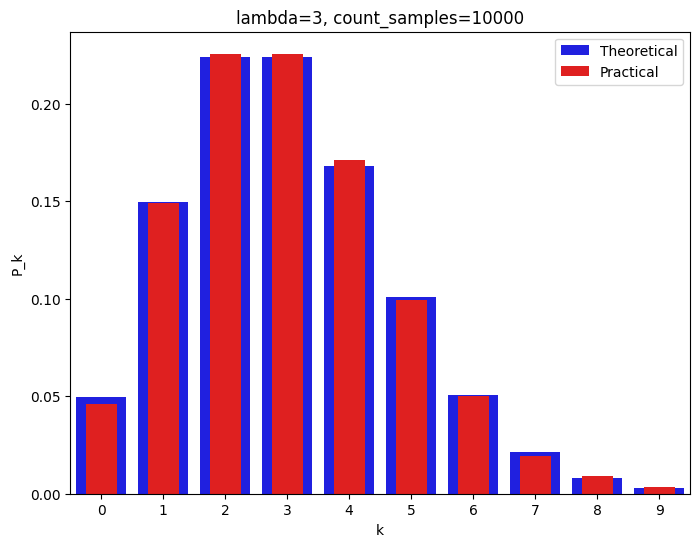

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=np.arange(x_r+1), y=theorPoiss, color="blue", label='Theoretical')
sns.barplot(x=np.arange(x_r+1), y=pracPoiss, color="red", label='Practical', width=0.5)
ax.set(xlabel='k', ylabel='P_k', title=f'lambda={lambda_}, count_samples={count_samples}')
ax.legend()

### Датчик пуассоновского распределения как предел биномиального

In [66]:
def PoissRnd_2(lambda_, *args, p=0.01):
    n = int(lambda_ / p)
    return BinomRnd(p, n, *args)
    

In [67]:
lambda_ = 10
count_samples = 10000
#Правило 3-х сигм для пуассоновского
x_r = int(lambda_ + 3 * np.sqrt(lambda_)) + 1
x_l = max(int(lambda_ - 3 * np.sqrt(lambda_)), 0)

In [68]:
theorPoiss = [np.e**(-lambda_)*(lambda_**k)/factorial(k) for k in range(x_l, x_r + 1)]

Samples = PoissRnd_2(lambda_, count_samples)
pracPoiss = [np.sum(Samples==k)/count_samples for k in range(x_l, x_r + 1)]

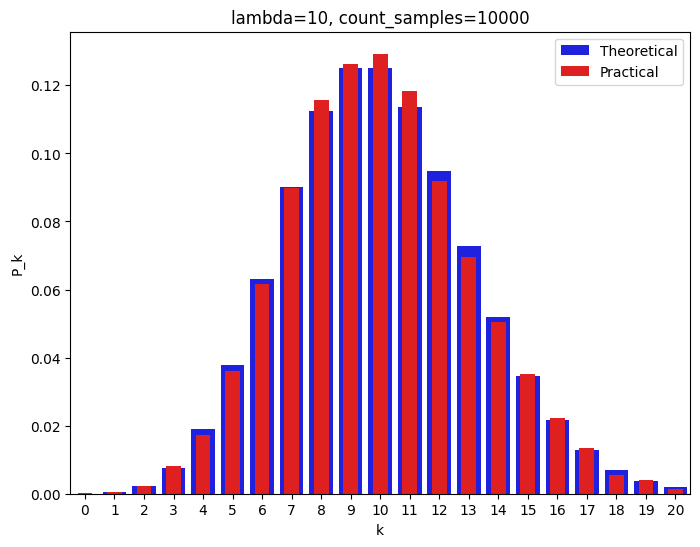

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=np.arange(x_l, x_r+1), y=theorPoiss, color="blue", label='Theoretical')
sns.barplot(x=np.arange(x_l, x_r+1), y=pracPoiss, color="red", label='Practical', width=0.5)
ax.set(xlabel='k', ylabel='P_k', title=f'lambda={lambda_}, count_samples={count_samples}')
ax.legend()

### Критерий Пирсона

In [70]:
import math

In [71]:
def PearsonCrit(samples, pArray, eps=1e-10, alpha=0.05, nums=10000):
    n = np.size(samples)
    uniq, idx, counts = np.unique(samples, return_index=True, return_counts=True)  
    freq = counts / n
    T_n = n * np.sum((freq - pArray[idx])**2 / pArray[idx])
    
    r = np.size(uniq) - 1
    const = 1 / (2**(r/2) * math.gamma(r/2))
    k = 2 * r - 4
    r_bnd = max(np.e, k**2, int(4 * np.log(4 * const / eps)) + 1)
    
    x = np.linspace(T_n, r_bnd, nums)
    y = x**(r/2 - 1) * np.e**(-x/2) * const
    p_value = np.trapz(y, x) #вычисляем интеграл по плотности распределения статистики хи-квадрат от наблюдаемой 
                             #статистики до +inf, так как у критерия критическая область справа, то получено 
                             #значения p_value, но работает критерий (даёт alpha % ошибки для заранее известной 
                             #верной H_0) при 1-p_value > alpha, получается он левосторонний или у меня ошибка в 
                             #рассуждениях?
    
    #x_1 = np.linspace(0, T_n, nums)
    #y_1 = x_1**(r/2 - 1) * np.e**(-x_1/2) / (2**(r/2) * math.gamma(r/2))
    #print(np.trapz(y_1, x_1))
    #print(p_value)
    #print(T_n)
    return 1 - p_value > alpha

In [72]:
#Частота принятия гипотезы, для отчёта
lambda_ = 3
sum_ = 0
count_it = 1000
count_samples = 1000
for i in range(count_it):
    Samples = PoissRnd_2(lambda_, count_samples)
    theorPoiss = np.array([np.e**(-lambda_)*(lambda_**Samples[k])/factorial(Samples[k]) for k in range(count_samples)])
    sum_ += PearsonCrit(Samples, theorPoiss)
    
    
sum_ / count_it

0.957

### Датчик стандартного нормального распределения

In [73]:
def NormRnd_1(*args):
    if args:
        if type(args[0]) == int:
            list_args = list(args)
        else:
            list_args = args[0]
    else:
        list_args = [1]
        
    phi = np.random.uniform(0, 2*np.pi, size=list_args)
    rho = ExpRnd(0.5, list_args)
    
    return [np.sqrt(rho) * np.cos(phi), np.sqrt(rho) * np.sin(phi)] 

In [74]:
count_samples = 1000

In [75]:
pracNorm = NormRnd_1(count_samples)[0] #1 для проверки sqrt(w)*sin(phi)
pracNorm = np.sort(pracNorm)

#Правило трёх сигм
x_r = 3
#Для удобства интерполяции
pracNorm = np.insert(pracNorm, 0, -x_r) 
pracNorm = np.append(pracNorm, x_r)

F_prac = [(i+1) / count_samples for i in range(count_samples)]
f = interp1d(pracNorm, [0] + F_prac + [1], kind='previous')
num = 10001 
x = np.linspace(-x_r, x_r, num=num)
F_prac = f(x)

f_theor = 1 / np.sqrt(2 * np.pi) * np.e**(-(x**2) / 2)
F_theor = [np.trapz(f_theor[:i], x[:i]) for i in range(num)]

[Text(0.5, 1.0, ' expexted_value = 0, dispersion = 1, count_samples = 1000')]

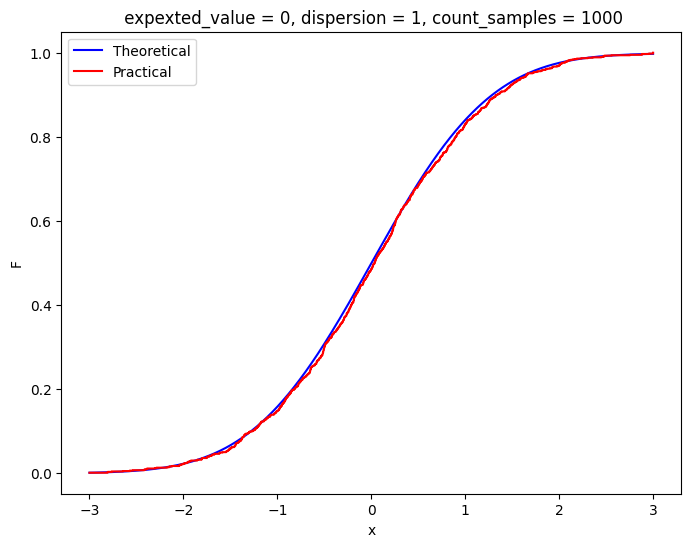

In [76]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f' expexted_value = 0, dispersion = 1, count_samples = {count_samples}')

### t-критерий Стьюдента

In [77]:
def t_student(samples, eps=1e-10, num=10000, alpha=0.05):
    expected_value = np.mean(samples)
    n = np.size(samples)
    dispersion = np.sum((samples - expected_value)**2) / (n - 1)
    T_n = expected_value * np.sqrt(n) / np.sqrt(dispersion)
    
    n -= 1 #Степеней свободы
    const = math.gamma((n+1)/2) / (np.sqrt(np.pi*n) * math.gamma(n/2)) #Для наглядности вынес
    bnd = int(const**(1/(2*n-1)) * 2 * n**(n/(2*n-1)) / (eps*(2*n-1))**(1/(2*n-1))) + 1 #Из вывода в отчёте
    x = np.linspace(-bnd, bnd, num)
    f_student = const * (1 + x**2 / n) ** (-(n+1)/2)

    if T_n >= 0: 
        p_value = np.trapz(f_student[x <= -T_n], x[x <= -T_n])#Достаточно проверить левую сторону, в силу симметрии
    else:
        p_value = np.trapz(f_student[x > -T_n], x[x > -T_n])
    
    return (p_value > alpha / 2) 

In [78]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 100
for i in range(count_it):
    pracNorm = NormRnd_1(count_samples)[0]
    sum_ += t_student(pracNorm)
    
sum_ / count_it

0.9535

In [79]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 100
for i in range(count_it):
    pracNorm = NormRnd_1(count_samples)[1]
    sum_ += t_student(pracNorm)
    
sum_ / count_it

0.9498

### Критерий Фишера

In [80]:
from scipy.stats import f #для подсчёта квантилей

In [81]:
def FisherCrit(samples_1, samples_2, eps=1e-10, alpha=0.05):
    expected_value_1 = np.mean(samples_1)
    n_1 = np.size(samples_1)
    dispersion_1 = np.sum((samples_1 - expected_value_1)**2) / (n_1 - 1)
    
    expected_value_2 = np.mean(samples_2)
    n_2 = np.size(samples_2)
    dispersion_2 = np.sum((samples_2 - expected_value_2)**2) / (n_2 - 1)
    
    T_n = dispersion_1 / dispersion_2
    
    F_alpha_l = f.ppf(alpha/2, n_1-1, n_2-1) #Квантиль alpha/2 для f-distribution
    F_alpha_r = f.ppf(1-alpha/2, n_1-1, n_2-1) 
    return (T_n > F_alpha_l) * (T_n < F_alpha_r) 

In [82]:
#Частота принятия гипотезы, для отчёта
sum_ = 0
count_it = 10000
count_samples = 10000
for i in range(count_it):
    x_1 = NormRnd_1(count_samples)[0]
    x_2 = NormRnd_1(count_samples)[1]
    sum_ += FisherCrit(x_1, x_2)
    
sum_ / count_it

0.9488

# Задание №4

### Датчик распределения Коши

In [83]:
def CauchyRnd(x_0, gamma, *args):
    if (gamma > 0):
        if args:
            if type(args[0]) == int:
                list_args = list(args)
            else:
                list_args = args[0]
            y = np.random.uniform(size=list_args)
        else:
            y = np.random.uniform()
            
        return np.tan((y-0.5)*np.pi) * gamma + x_0
        
    else: 
        print('Error! Gamma is out of bounds')

In [84]:
x_0 = -23
gamma = 5
count_samples = 1000

In [85]:
# 98% выборки для наглядности
x_l = np.tan((0.01-0.5)*np.pi) * gamma + x_0
x_r = np.tan((0.99-0.5)*np.pi) * gamma + x_0

pracCauchy = CauchyRnd(x_0, gamma, count_samples)
pracCauchy = np.sort(pracCauchy)
#Добавил краевое значение для удобства интерполяции
pracCauchy = np.insert(pracCauchy, 0, x_l)

F_prac = [(i+1) / count_samples for i in range(count_samples)]
#Есть вероятность не выйти за x_r => проблемы с построением эмпирической через интерполяцию
if pracCauchy[-1] < x_r:
    pracCauchy = np.append(pracCauchy, x_r)
    f = interp1d(pracCauchy, [0] + F_prac + [1], kind='previous')
else:
    f = interp1d(pracCauchy, [0] + F_prac, kind='previous')

num = 10001 
x = np.linspace(x_l, x_r, num=num)
F_prac = f(x)
F_theor = 1 / np.pi * np.arctan((x - x_0) / gamma) + 0.5

[Text(0.5, 1.0, ' x_0 = -23, gamma = 5, count_samples = 1000')]

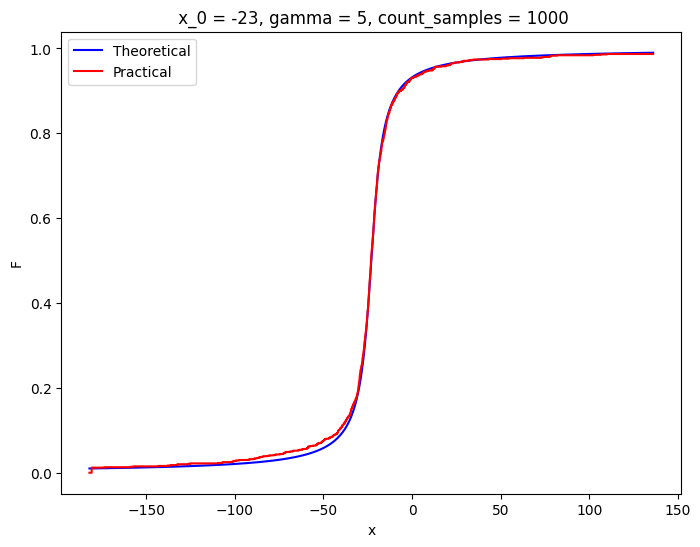

In [86]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f' x_0 = {x_0}, gamma = {gamma}, count_samples = {count_samples}')

### Датчик стандартного нормального распределения методом фон Неймана

In [87]:
def NormRnd_2(*args, k=3):
    if args:
        if type(args[0]) == int:
            list_args = list(args)
        else:
            list_args = args[0]
        finish = np.zeros(list_args)
        x_finish = np.zeros(list_args)
    else:
        finish = np.array(0)
        x_finish = np.array(0)
    
    while (finish == 0).any():   
        x = CauchyRnd(0, 1, *args)
        p_1 = 1 / (np.pi * (x**2 + 1)) 
        p_2 = 1 / np.sqrt(2 * np.pi) * np.e**(-x**2 / 2)
        R = p_2 / (k * p_1)
        
        cur = BernRnd(R, *args)
        finish = finish.astype(int) | cur
        x_finish += (x_finish == 0) * (cur == 1) * x    
        
    return x_finish   

In [88]:
count_samples = 1000
x = NormRnd_2(count_samples)

In [89]:
from scipy.stats import probplot

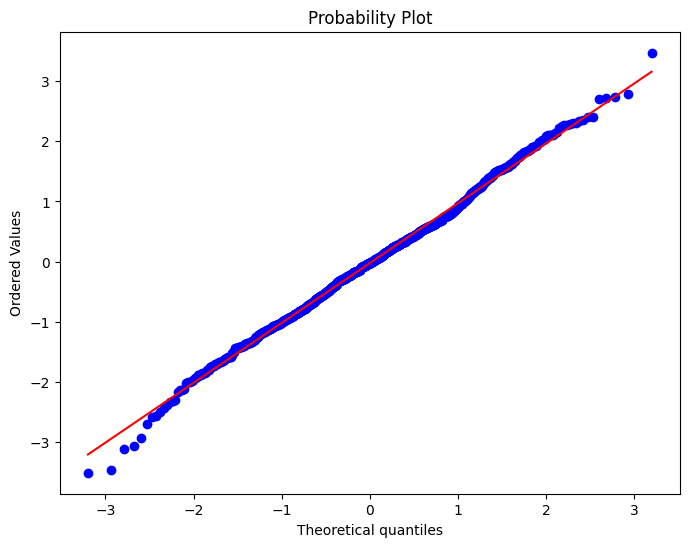

In [90]:
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot()    
data = probplot(x, plot=ax) # QQ-graphic

### Сравнение скорости моделирования 

In [91]:
import time

In [92]:
count_samples = np.arange(1, 1000, 10)
repeat = 1000
timer = []
for count in count_samples:
    timer_tmp_1 = []
    timer_tmp_2 = []
    for i in range(repeat):
        start_time = time.time()
        NormRnd_1(count)[0]
        end_time = time.time()
        timer_tmp_1.append(end_time - start_time)

        start_time = time.time()
        NormRnd_2(count)
        end_time = time.time()
        timer_tmp_2.append(end_time - start_time)
        
    mean_time = sum(timer_tmp_1) / repeat
    timer.append(mean_time)
    
    mean_time = sum(timer_tmp_2) / repeat
    timer.append(mean_time)

[Text(0.5, 0, 'count_samples'), Text(0, 0.5, 'time')]

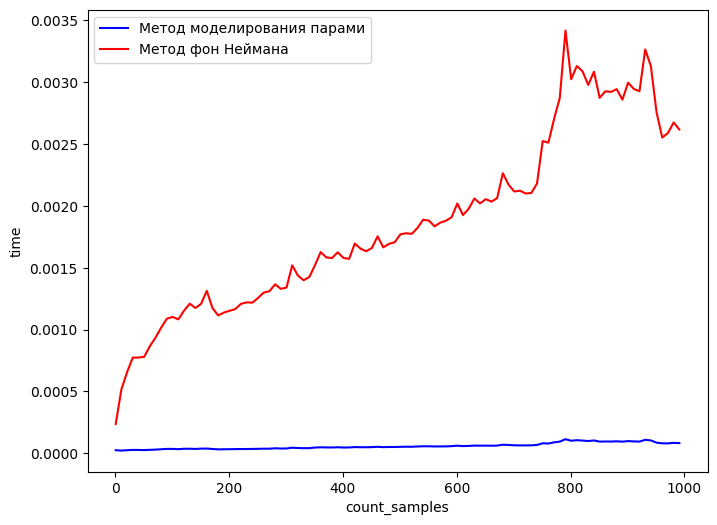

In [93]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(count_samples, timer[0::2], color='blue', label='Метод моделирования парами')
plt.plot(count_samples, timer[1::2], color='red', label='Метод фон Неймана')
plt.legend()
ax.set(xlabel='count_samples', ylabel='time')

# Задание №5

### Закон больших чисел

In [94]:
sigma = 3
mu = 2
count_samples = 100000

In [95]:
Samples = NormRnd_1(count_samples)[0]
Samples = np.sqrt(sigma) * Samples + mu
nums = np.arange(1, count_samples+1)
Expected_value = np.cumsum(Samples)
Expected_value /= nums  

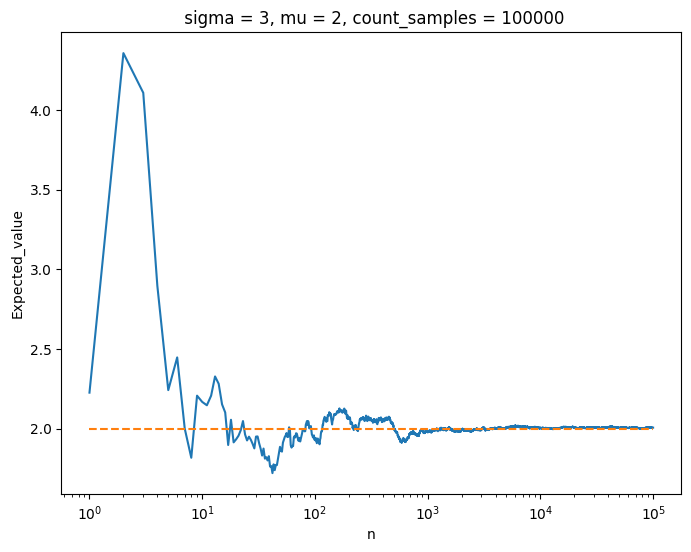

In [96]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(nums, Expected_value)
plt.plot([1, nums[-1]], [mu, mu], '--')
ax.set_xscale('log')
ax.set(xlabel='n', ylabel='Expected_value')
ax.set(title=f' sigma = {sigma}, mu = {mu}, count_samples = {count_samples}')
plt.show()

### Центральная предельная теорема

In [120]:
sigma = 1
mu = 5
count_samples = 10000
repeat = 1000

In [121]:
# Правило трёх сигм для стандартного нормального
x_l = -3
x_r = 3

Samples = NormRnd_1(count_samples, repeat)[0]
Samples = np.sqrt(sigma) * Samples + mu

T_n = np.sqrt(count_samples) * (np.sum(Samples, axis=0) / count_samples - mu)
T_n = np.sort(T_n)
#Для удобства интерполяции
T_n = np.insert(T_n, 0, x_l)

F_prac = [(i+1) / repeat for i in range(repeat)]
#Есть вероятность не выйти за x_r => проблемы с построением эмпирической через интерполяцию
if T_n[-1] < x_r:
    T_n = np.append(T_n, x_r)
    f = interp1d(T_n, [0] + F_prac + [1], kind='previous')
else:
    f = interp1d(T_n, [0] + F_prac, kind='previous')

num = 10001 
x = np.linspace(x_l, x_r, num=num)
F_prac = f(x)

f_theor = 1 / np.sqrt(2 * np.pi) * np.e**(-(x**2) / 2)
F_theor = [np.trapz(f_theor[:i], x[:i]) for i in range(num)]

[Text(0.5, 1.0, ' sigma = 1, mu = 5, count_samples = 10000')]

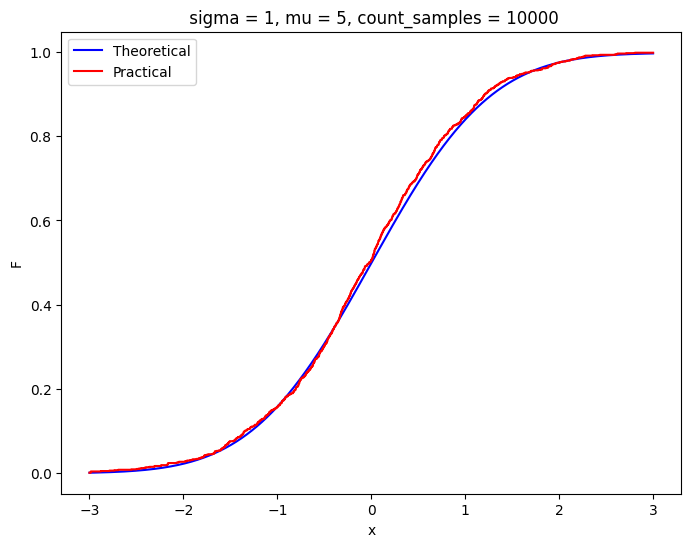

In [122]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f' sigma = {sigma}, mu = {mu}, count_samples = {count_samples}')

### Доверительные интервалы

### Для среднего

In [100]:
safety_coeff = 0.95
sigma = 4
mu = 5
count_samples = 1000

In [101]:
from scipy.stats import t

In [102]:
Samples = NormRnd_1(count_samples)[0]
Samples = np.sqrt(sigma) * Samples + mu
nums = np.arange(1, count_samples+1)

Expected_value = np.cumsum(Samples)
Expected_value /= nums

Dispersion = np.sum(np.triu(Samples[:, np.newaxis] - Expected_value)**2, axis=0) / nums

t_gamma = t.ppf((1+safety_coeff)/2, count_samples-1) #Квантиль (1+safety_coeff)/2 t-distribution

l_bnd = Expected_value - np.sqrt(Dispersion / count_samples) * t_gamma
r_bnd = Expected_value + np.sqrt(Dispersion / count_samples) * t_gamma

<ErrorbarContainer object of 3 artists>

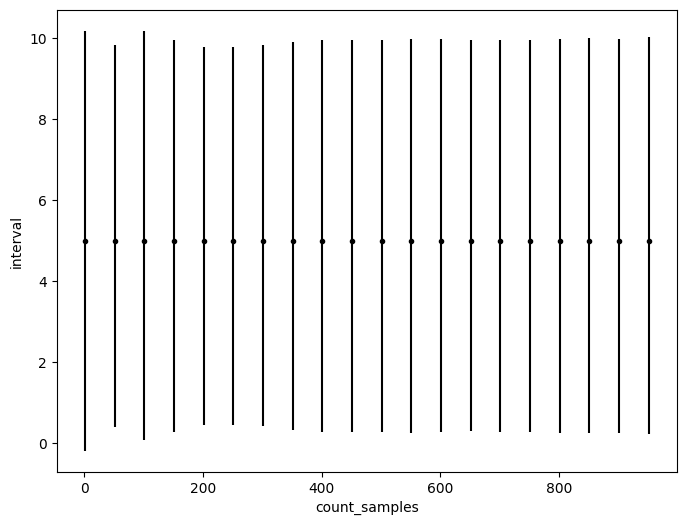

In [103]:
step = 50 
x = nums[::step]
y = np.ones(np.shape(nums))[::step] * mu
yerr = np.vstack([l_bnd[::step], r_bnd[::step]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.set(xlabel='count_samples', ylabel='interval')
plt.errorbar(x, y, yerr=yerr, fmt='.k')

### Для дисперсии

In [104]:
from scipy.stats import chi2

In [105]:
safety_coeff = 0.95
sigma = 1
mu = 50
count_samples = 1000

In [106]:
Samples = NormRnd_1(count_samples)[0]
Samples = np.sqrt(sigma) * Samples + mu
nums = np.arange(1, count_samples+1)

Expected_value = np.cumsum(Samples)
Expected_value /= nums

Dispersion = np.sum(np.triu(Samples[:, np.newaxis] - Expected_value)**2, axis=0) / nums

eps_1 = 0.025
eps_2 = 1 - safety_coeff - eps_1 

chi_eps_1 = chi2.ppf(1-eps_1, count_samples-1) #Квантиль 1-eps_1, chi2-distribution
chi_eps_2 = chi2.ppf(eps_2, count_samples-1)

l_bnd = (count_samples - 1) * Dispersion / chi_eps_1
r_bnd = (count_samples - 1) * Dispersion / chi_eps_2

<ErrorbarContainer object of 3 artists>

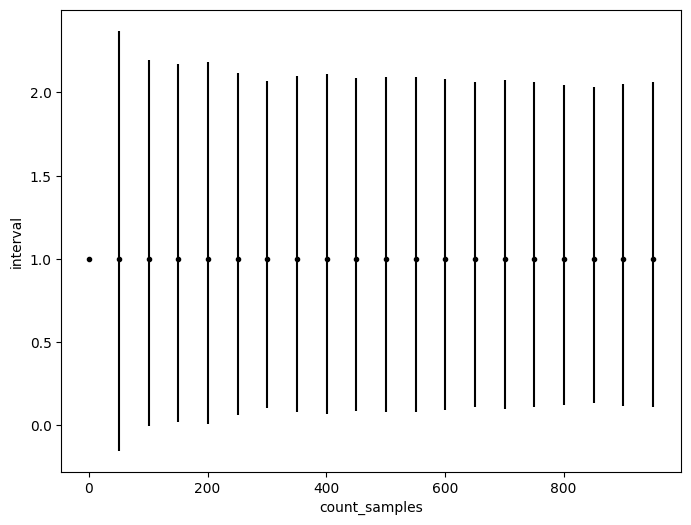

In [107]:
step = 50
x = nums[::step]
y = np.ones(np.shape(nums))[::step] * sigma
yerr = np.vstack([l_bnd[::step], r_bnd[::step]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.set(xlabel='count_samples', ylabel='interval')
plt.errorbar(x, y, yerr=yerr, fmt='.k')

### 5.3

In [108]:
x_0 = 0
gamma = 2
count_samples = 10000

In [109]:
Samples = CauchyRnd(x_0, gamma, count_samples)

nums = np.arange(1, count_samples + 1)
Expected_value = np.cumsum(Samples)
Expected_value /= nums

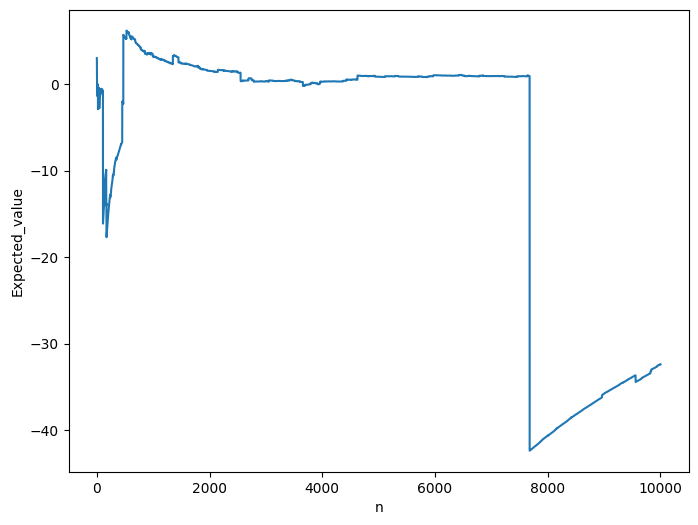

In [110]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(nums, Expected_value)
#plt.plot([1, nums[-1]], [mu, mu], '--')
#ax.set_xscale('log')
ax.set(xlabel='n', ylabel='Expected_value')
#ax.set(title=f' sigma = {sigma}, mu = {mu}, count_samples = {count_samples}')
plt.show()

In [111]:
x_0 = 0
gamma = 2
count_samples = 100
repeat = 1000

In [112]:
# 98% выборки для наглядности
x_l = np.tan((0.01-0.5)*np.pi) * gamma + x_0
x_r = np.tan((0.99-0.5)*np.pi) * gamma + x_0

Samples = CauchyRnd(x_0, gamma, count_samples, repeat)
T_n = np.sum(Samples, axis=0) / count_samples
T_n = np.sort(T_n)
T_n = np.insert(T_n, 0, x_l)

F_prac = [(i+1) / repeat for i in range(repeat)]
if T_n[-1] < x_r:
    T_n = np.append(T_n, x_r)
    f = interp1d(T_n, [0] + F_prac + [1], kind='previous')
else:
    f = interp1d(T_n, [0] + F_prac, kind='previous')

num = 10001 
x = np.linspace(x_l, x_r, num=num)
F_prac = f(x)
F_theor = 1 / np.pi * np.arctan((x - x_0) / gamma) + 0.5

[Text(0.5, 1.0, ' x_0 = 0, gamma = 2, count_samples = 1000')]

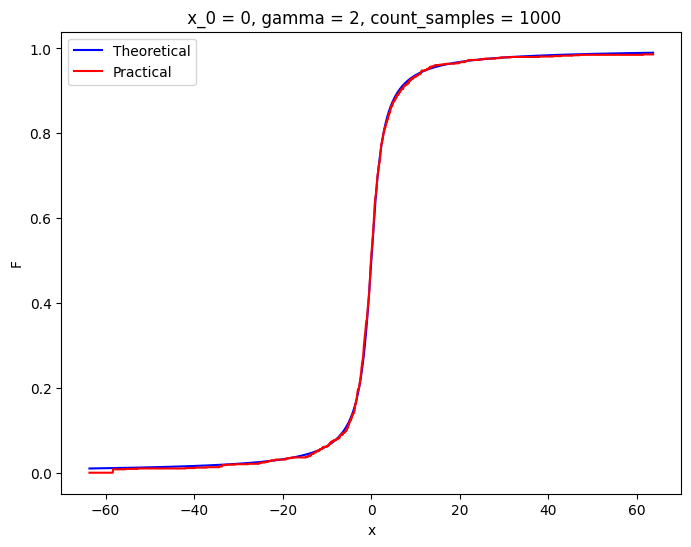

In [113]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()    
plt.plot(x, F_theor, color='blue', label='Theoretical')
plt.plot(x, F_prac, color='red', label='Practical')
plt.legend()
ax.set(xlabel='x', ylabel='F')
ax.set(title=f' x_0 = {x_0}, gamma = {gamma}, count_samples = {repeat}')

# Задание №6

### Монте-Карло

In [114]:
safety_coeff = 0.95
sigma = 0.5
mu = 0
count_samples = 10000000
n = 10

In [115]:
%%time
Samples = NormRnd_1(count_samples, n)[0]
Samples = np.sqrt(sigma) * Samples + mu

x = np.prod(Samples, axis=1)
x = x * x

f = (np.pi**5 * np.e**(-1 / (2**7 * x))) / x

np.mean(f)

CPU times: user 8.93 s, sys: 16.5 s, total: 25.4 s
Wall time: 37 s


124.90914695141451

### Метод квадратур

In [116]:
N = 4

In [117]:
from itertools import product

In [118]:
%%time
x = np.linspace(-1.0, 1.0, N+1)
x = (x[:-1] + x[1:]) / 2
sum_ = 0

sin_square = np.sin(np.pi/2 * x)**2
tg_square = np.tan(np.pi/2 * x)**2
idx = range(N)
const = 2**7
for i in product(idx, repeat=10):
    list_i = list(i)
    sum_+= np.e**(-np.sum(tg_square[list_i]) - 1/(const * np.prod(tg_square[list_i]))) / np.prod(sin_square[list_i])
(np.pi / N)**10 * sum_

CPU times: user 21.6 s, sys: 469 µs, total: 21.6 s
Wall time: 21.7 s


0.08679724383596868